<a href="https://colab.research.google.com/github/AparnaIyer06/Natural-Language-Processing-NLP-/blob/main/NLP_Lab_Assignment1_AparnaIyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Aparna Iyer

PRN: 22070126017

Batch: 2022-2026, AI-ML A1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install nltk


In [ ]:
pip install chardet

In [ ]:
import nltk          #Natural Language Toolkit
import pandas as pd
import re             #Regular Expressions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')  #For tokenization
nltk.download('stopwords') #For stopword removal
nltk.download('wordnet') #For lemmatization
nltk.download('omw-1.4') #For cross-lingual lemmatization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

##1. Define Pre-processing Functions

In [ ]:
#For Tokenization and Lemmatization

#Preprocessing function: Tokenization and Lemmatization

def preprocess_text(text):

    #Creating an object of the class WordNetLemmatizer and storing it in lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Tokenize
    tokens = word_tokenize(text.lower())

    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  #.lemmatize() is a method of the class WordNetLemmatizer

    return tokens


In [ ]:
#Data Cleaning: Remove Stop-Words, Symbols, and URLs

def clean_text(text):

  stop_words = set(stopwords.words('english'))

  # Convert non-string types to string
  if not isinstance(text, str):
      text = str(text)
  # Remove URLs
  #Using Regular Expressions library, re
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

  # Remove symbols and numbers
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\d', ' ', text)

  # Tokenize and remove stopwords
  tokens = word_tokenize(text.lower())
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # Join tokens back into a string
  return ' '.join(filtered_tokens)


In [ ]:
import pandas as pd
import chardet

def detect_encoding(file_path, num_bytes=10000):
    """
    Detect the encoding of a file using chardet.
    """
    with open(file_path, 'rb') as file:
        raw_data = file.read(num_bytes)
        result = chardet.detect(raw_data)
        encoding = result['encoding']
    return encoding

def read_csv_with_encoding(file_path, encoding):
    """
    Read a CSV file with the specified encoding.
    """
    try:
        df = pd.read_csv(file_path, encoding=encoding)
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError with encoding {encoding}. Trying 'latin1' encoding.")
        df = pd.read_csv(file_path, encoding='latin1')
    return df

# Define the path to your file
#file_path = '/content/drive/MyDrive/Colab Notebooks/Reviews-2.csv'  # Replace with your file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Reviews-1.csv'  # Replace with your file path

# Detect the encoding
encoding = detect_encoding(file_path)
print(f"Detected encoding: {encoding}")

# Attempt to read the CSV file with the detected encoding
df_reviews = read_csv_with_encoding(file_path, encoding)

# Display the last 5 rows of the dataframe
print(df_reviews.tail())

Detected encoding: ascii
UnicodeDecodeError with encoding ascii. Trying 'latin1' encoding.
            Id   ProductId          UserId     ProfileName  \
552084  552085  B0002NYO1G  A233VYR81F16N0   Julie Stefano   
552085  552086  B0002NYO1G  A1KZ5IFFTOP7VN            Mary   
552086  552087  B0002NYO1G  A10SORC6LLRCTF     K. Bernauer   
552087  552088  B0002NYO1G  A1JUPMQ29HWR1W  Jon Mccullough   
552088  552089  B000F3OBNY  A3AD1S5QPABFMJ          Soxrox   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
552084                     0                       0      5  1316044800   
552085                     0                       0      5  1312156800   
552086                     1                      19      5  1216252800   
552087                     1                      32      1  1227398400   
552088                     2                       2      5  1297123200   

                   Summary                                               Text  
55208

In [ ]:
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df_reviews.shape

(552089, 10)

In [ ]:
# Apply cleansing
df_reviews['cleaned_summary'] = df_reviews.iloc[:, -2].apply(clean_text)
df_reviews['cleaned_text'] = df_reviews.iloc[:, -1].apply(clean_text)

# Apply tokenization and lemmatization
df_reviews['Summary'] = df_reviews['cleaned_summary'].apply(preprocess_text)
df_reviews['Text'] = df_reviews['cleaned_text'].apply(preprocess_text)


In [ ]:
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_summary,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,"[good, quality, dog, food]","[good, quality, dog, food]",good quality dog food,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,[advertised],[advertised],advertised,advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"[delight, say]","[delight, say]",delight says,delight says
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,"[cough, medicine]","[cough, medicine]",cough medicine,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,"[great, taffy]","[great, taffy]",great taffy,great taffy


In [ ]:
df_reviews.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_summary,cleaned_text
552084,552085,B0002NYO1G,A233VYR81F16N0,Julie Stefano,0,0,5,1316044800,[lovely],[lovely],lovely,lovely
552085,552086,B0002NYO1G,A1KZ5IFFTOP7VN,Mary,0,0,5,1312156800,"[culinary, lavender]","[culinary, lavender]",culinary lavender,culinary lavender
552086,552087,B0002NYO1G,A10SORC6LLRCTF,K. Bernauer,1,19,5,1216252800,"[beyond, wonderful]","[beyond, wonderful]",beyond wonderful,beyond wonderful
552087,552088,B0002NYO1G,A1JUPMQ29HWR1W,Jon Mccullough,1,32,1,1227398400,"[taste, like, soap]","[taste, like, soap]",tastes like soap,tastes like soap
552088,552089,B000F3OBNY,A3AD1S5QPABFMJ,Soxrox,2,2,5,1297123200,"[great, buy]","[great, buy]",great buy,great buy


##Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #Count Vectorizer, Tf-idf Vectorizer


In [ ]:
texts = df_reviews['Text'].tolist()  # List of processed text

summaries=df_reviews['Summary'].tolist() #List of processed Summaries


In [ ]:
print(texts[:5])

[['good', 'quality', 'dog', 'food'], ['advertised'], ['delight', 'say'], ['cough', 'medicine'], ['great', 'taffy']]


In [ ]:
# As texts is a list of lists, join the tokens into strings
texts = [' '.join(text) if isinstance(text, list) else text for text in texts]
summaries = [' '.join(summary) if isinstance(summary, list) else summary for summary in summaries]

In [ ]:
print(texts[:5])
print(summaries[:5])

['good quality dog food', 'advertised', 'delight say', 'cough medicine', 'great taffy']
['good quality dog food', 'advertised', 'delight say', 'cough medicine', 'great taffy']


## A. Count Vectorizer

In [ ]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the data
count_matrix_texts = count_vectorizer.fit_transform(texts)

# Convert to a DataFrame for better readability
count_df_texts = pd.DataFrame(count_matrix_texts.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the result
print(count_df_texts.head())


   __  ____  ___________  ________________it  _______________it  __________it  \
0   0     0            0                   0                  0             0   
1   0     0            0                   0                  0             0   
2   0     0            0                   0                  0             0   
3   0     0            0                   0                  0             0   
4   0     0            0                   0                  0             0   

   _not_  _very_  a_n_y  aa  ...  zylotol  zym  zyrup  zz  zzfantastic  zzzzs  \
0      0       0      0   0  ...        0    0      0   0            0      0   
1      0       0      0   0  ...        0    0      0   0            0      0   
2      0       0      0   0  ...        0    0      0   0            0      0   
3      0       0      0   0  ...        0    0      0   0            0      0   
4      0       0      0   0  ...        0    0      0   0            0      0   

   zzzzz  zzzzzzzzz  zzzzz

In [ ]:
count_matrix_summaries = count_vectorizer.fit_transform(summaries)

# Convert to a DataFrame for better readability
count_df_summaries = pd.DataFrame(count_matrix_summaries.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the result
print(count_df_summaries.head())

   __  ____  ___________  ________________it  _______________it  __________it  \
0   0     0            0                   0                  0             0   
1   0     0            0                   0                  0             0   
2   0     0            0                   0                  0             0   
3   0     0            0                   0                  0             0   
4   0     0            0                   0                  0             0   

   _not_  _very_  a_n_y  aa  ...  zylotol  zym  zyrup  zz  zzfantastic  zzzzs  \
0      0       0      0   0  ...        0    0      0   0            0      0   
1      0       0      0   0  ...        0    0      0   0            0      0   
2      0       0      0   0  ...        0    0      0   0            0      0   
3      0       0      0   0  ...        0    0      0   0            0      0   
4      0       0      0   0  ...        0    0      0   0            0      0   

   zzzzz  zzzzzzzzz  zzzzz

##B. Tf-Idf Vectorizer

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix_texts = tfidf_vectorizer.fit_transform(texts)

# Convert to a DataFrame for better readability
tfidf_df_texts = pd.DataFrame(tfidf_matrix_texts.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the result
print(tfidf_df_texts.head())


    __  ____  ___________  ________________it  _______________it  \
0  0.0   0.0          0.0                 0.0                0.0   
1  0.0   0.0          0.0                 0.0                0.0   
2  0.0   0.0          0.0                 0.0                0.0   
3  0.0   0.0          0.0                 0.0                0.0   
4  0.0   0.0          0.0                 0.0                0.0   

   __________it  _not_  _very_  a_n_y   aa  ...  zylotol  zym  zyrup   zz  \
0           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
1           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
2           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
3           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
4           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   

   zzfantastic  zzzzs  zzzzz  zzzzzzzzz  zzzzzzzzzzz   â½  
0          0.0    0.0    0.0        0.0          0.0  0.0  
1       

In [ ]:
tfidf_matrix_summaries = tfidf_vectorizer.fit_transform(summaries)

# Convert to a DataFrame for better readability
tfidf_df_summaries = pd.DataFrame(tfidf_matrix_summaries.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the result
print(tfidf_df_summaries.head())


    __  ____  ___________  ________________it  _______________it  \
0  0.0   0.0          0.0                 0.0                0.0   
1  0.0   0.0          0.0                 0.0                0.0   
2  0.0   0.0          0.0                 0.0                0.0   
3  0.0   0.0          0.0                 0.0                0.0   
4  0.0   0.0          0.0                 0.0                0.0   

   __________it  _not_  _very_  a_n_y   aa  ...  zylotol  zym  zyrup   zz  \
0           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
1           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
2           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
3           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   
4           0.0    0.0     0.0    0.0  0.0  ...      0.0  0.0    0.0  0.0   

   zzfantastic  zzzzs  zzzzz  zzzzzzzzz  zzzzzzzzzzz   â½  
0          0.0    0.0    0.0        0.0          0.0  0.0  
1       

##ML Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
# Example criteria for labeling: basic keyword presence
positive_keywords = ['good', 'great', 'excellent', 'positive', 'wonderful', 'best']
negative_keywords = ['bad', 'terrible', 'poor', 'negative', 'worst']
# Function to assign labels
def label_review(text):
    if isinstance(text, str):  # Check if text is a string

        if any(word in text for word in positive_keywords):
            return 1  # Positive
        elif any(word in text for word in negative_keywords):
            return -1  # Negative
        else:
            return 0  # Neutral or no sentiment
    else:
        #print(f"Unexpected type: {type(text)}")  # Debugging print statement
        return None  # Handle non-string inputs

df_reviews['Label'] = df_reviews['Text'].apply(label_review)
# Function to assign labels
def label_review(text):
    if any(word in text for word in positive_keywords):
        return 1  # Positive
    elif any(word in text for word in negative_keywords):
        return 0  # Negative
    else:
        return None  # Neutral or unknown

# Apply labeling function to create a new 'Label' column
df_reviews['Label'] = df_reviews['Text'].apply(label_review)

# Optionally drop rows with None (neutral) labels
df_reviews = df_reviews.dropna(subset=['Label'])

In [ ]:
# Convert lists to strings
df_reviews['Summary'] = df_reviews['Summary'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x) if x is not None else '')
df_reviews['Text'] = df_reviews['Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x) if x is not None else '')

# Combine 'Summary' and 'Text' columns into one
df_reviews['combined_text'] = df_reviews['Summary'].fillna('') + ' ' + df_reviews['Text'].fillna('')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_reviews['combined_text'], df_reviews['Score'], test_size=0.2, random_state=42)

# Define vectorizers
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TFIDFVectorizer': TfidfVectorizer()
}

In [ ]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC()
}

In [ ]:
def train_and_evaluate_model(vectorizer_name, vectorizer, model_name, model, X_train, X_test, y_train, y_test):
    # Transform the data
    X_train_vect = vectorizer.fit_transform(X_train).tocsr()  # Convert to sparse format
    X_test_vect = vectorizer.transform(X_test).tocsr()

    # Train the model
    model.fit(X_train_vect, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vect)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Using Vectorizer: {vectorizer_name}, Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name} with {vectorizer_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Clear variables after each iteration
    del X_train_vect, X_test_vect, y_pred, cm
    gc.collect()  # Force garbage collection

    print("="*80)


Using Vectorizer: CountVectorizer, Model: Logistic Regression
Accuracy: 0.7753497785469158
Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.61      0.62      1325
           2       0.49      0.17      0.25       868
           3       0.51      0.28      0.36      1867
           4       0.53      0.27      0.35      5611
           5       0.82      0.96      0.88     24422

    accuracy                           0.78     34093
   macro avg       0.60      0.46      0.49     34093
weighted avg       0.74      0.78      0.74     34093



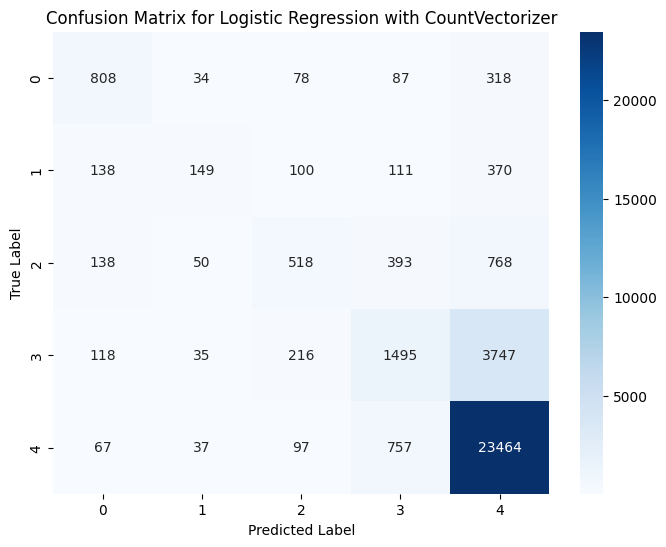

Using Vectorizer: CountVectorizer, Model: Random Forest
Accuracy: 0.8067051887484235
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.66      0.70      1325
           2       0.66      0.32      0.43       868
           3       0.63      0.42      0.50      1867
           4       0.60      0.42      0.50      5611
           5       0.85      0.95      0.90     24422

    accuracy                           0.81     34093
   macro avg       0.70      0.55      0.61     34093
weighted avg       0.79      0.81      0.79     34093



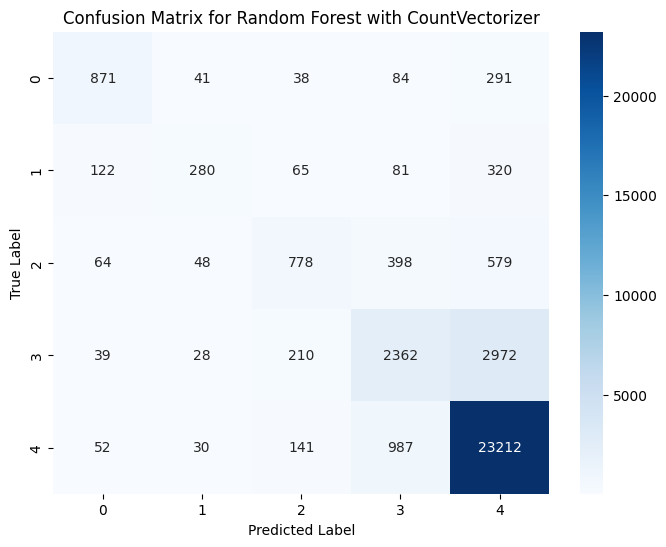

Using Vectorizer: CountVectorizer, Model: SVC
Accuracy: 0.8026281054761975
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.61      0.68      1325
           2       0.83      0.21      0.34       868
           3       0.70      0.31      0.43      1867
           4       0.64      0.34      0.45      5611
           5       0.82      0.98      0.89     24422

    accuracy                           0.80     34093
   macro avg       0.75      0.49      0.56     34093
weighted avg       0.78      0.80      0.77     34093



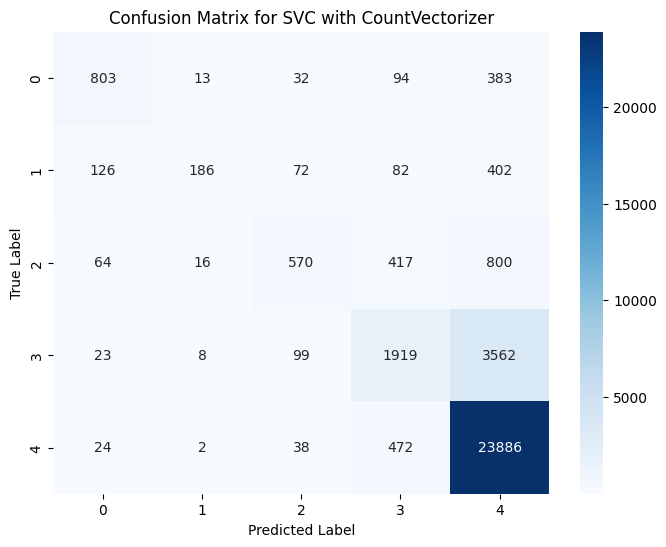

Using Vectorizer: TFIDFVectorizer, Model: Logistic Regression
Accuracy: 0.7614759628076144
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.53      0.57      1325
           2       0.47      0.06      0.10       868
           3       0.51      0.18      0.27      1867
           4       0.46      0.26      0.33      5611
           5       0.81      0.96      0.88     24422

    accuracy                           0.76     34093
   macro avg       0.57      0.40      0.43     34093
weighted avg       0.72      0.76      0.72     34093



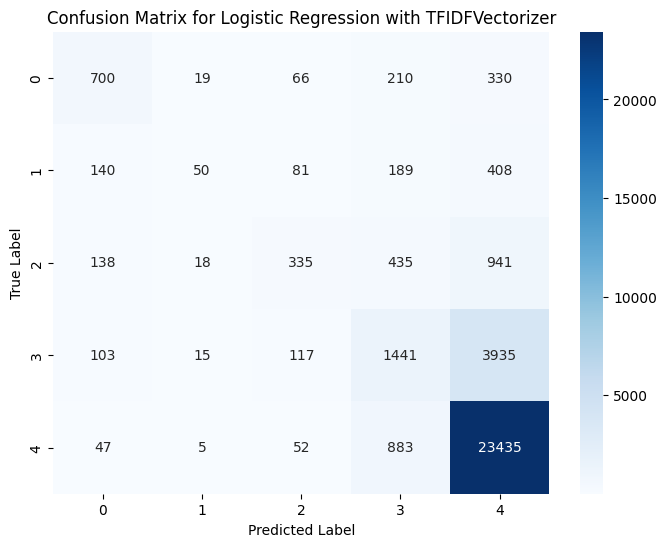

Using Vectorizer: TFIDFVectorizer, Model: Random Forest
Accuracy: 0.8129234740269263
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.67      0.71      1325
           2       0.69      0.31      0.43       868
           3       0.68      0.39      0.50      1867
           4       0.65      0.41      0.50      5611
           5       0.84      0.96      0.90     24422

    accuracy                           0.81     34093
   macro avg       0.72      0.55      0.61     34093
weighted avg       0.80      0.81      0.79     34093



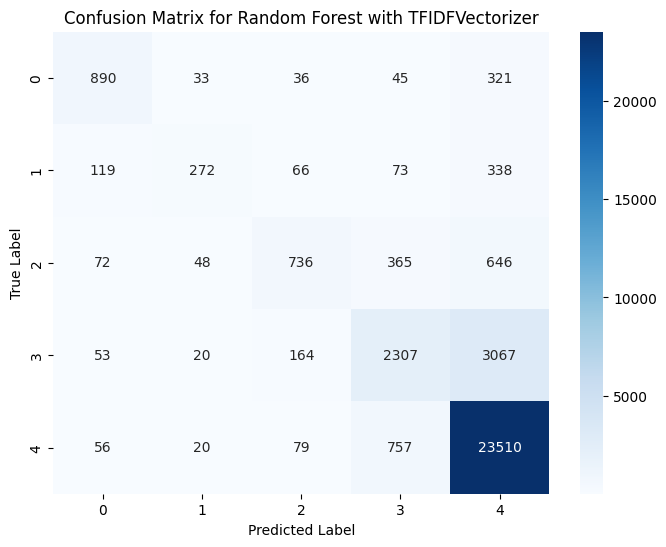

Using Vectorizer: TFIDFVectorizer, Model: SVC
Accuracy: 0.8058545742527792
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.67      0.70      1325
           2       0.80      0.24      0.36       868
           3       0.69      0.34      0.46      1867
           4       0.65      0.35      0.45      5611
           5       0.83      0.97      0.90     24422

    accuracy                           0.81     34093
   macro avg       0.74      0.51      0.57     34093
weighted avg       0.79      0.81      0.78     34093



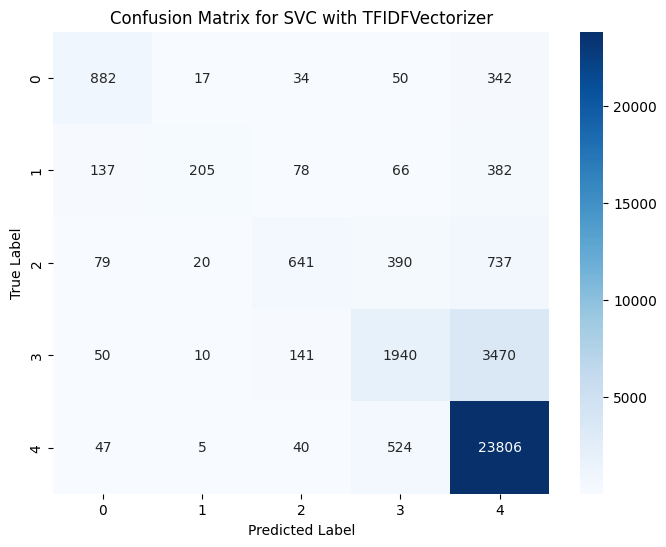

In [ ]:
# Iterate over vectorizers and models separately
for vectorizer_name, vectorizer in vectorizers.items():
    for model_name, model in models.items():
        # Call the function for training and evaluating each model separately
        train_and_evaluate_model(vectorizer_name, vectorizer, model_name, model, X_train, X_test, y_train, y_test)
        #print(vectorizer_name,model_name)

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "drive/My Drive/Colab Notebooks/NLP_Lab_Assignment1 (All Data).ipynb"

[NbConvertApp] Converting notebook drive/My Drive/Colab Notebooks/NLP_Lab_Assignment1 (All Data).ipynb to PDF
[NbConvertApp] Support files will be in NLP_Lab_Assignment1 (All Data)_files/
[NbConvertApp] Making directory ./NLP_Lab_Assignment1 (All Data)_files
[NbConvertApp] Writing 75708 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 261653 bytes to drive/My Drive/Colab Notebooks/NLP_Lab_Assignment1 (All Data).pdf
